In [126]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

##Question 1 :: Launch a new python notebook and read the data set. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [127]:
car_df = pd.read_csv("cars-dataset.csv")
print(car_df.shape)

(398, 8)


In [128]:
car_df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [129]:
#Looking at the data set info, there are no null in the data frame.
#There are some ? present in the hp column, hence next job of EDA will be to replace ? with mean of the column.
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [130]:
#Replacing the ? character in the hp column with the mean value. The hp column is of type object which is subsequently
#converted to int
car_df["hp"] = car_df["hp"].replace(to_replace = "?",value = 0).astype('int64')
car_df["hp"] = car_df["hp"].replace(to_replace = 0 ,value = round(car_df["hp"].mean()))
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
None


## Question 2:: Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

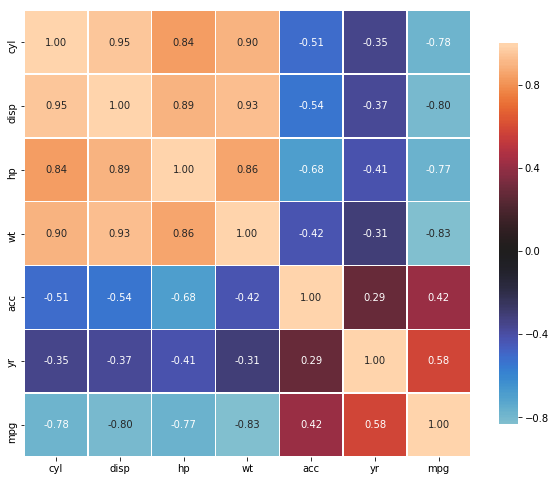

In [131]:
plt.figure(figsize=(10, 10))
sns.heatmap(car_df.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.4, annot=True, cbar_kws={"shrink": .70})
plt.show();

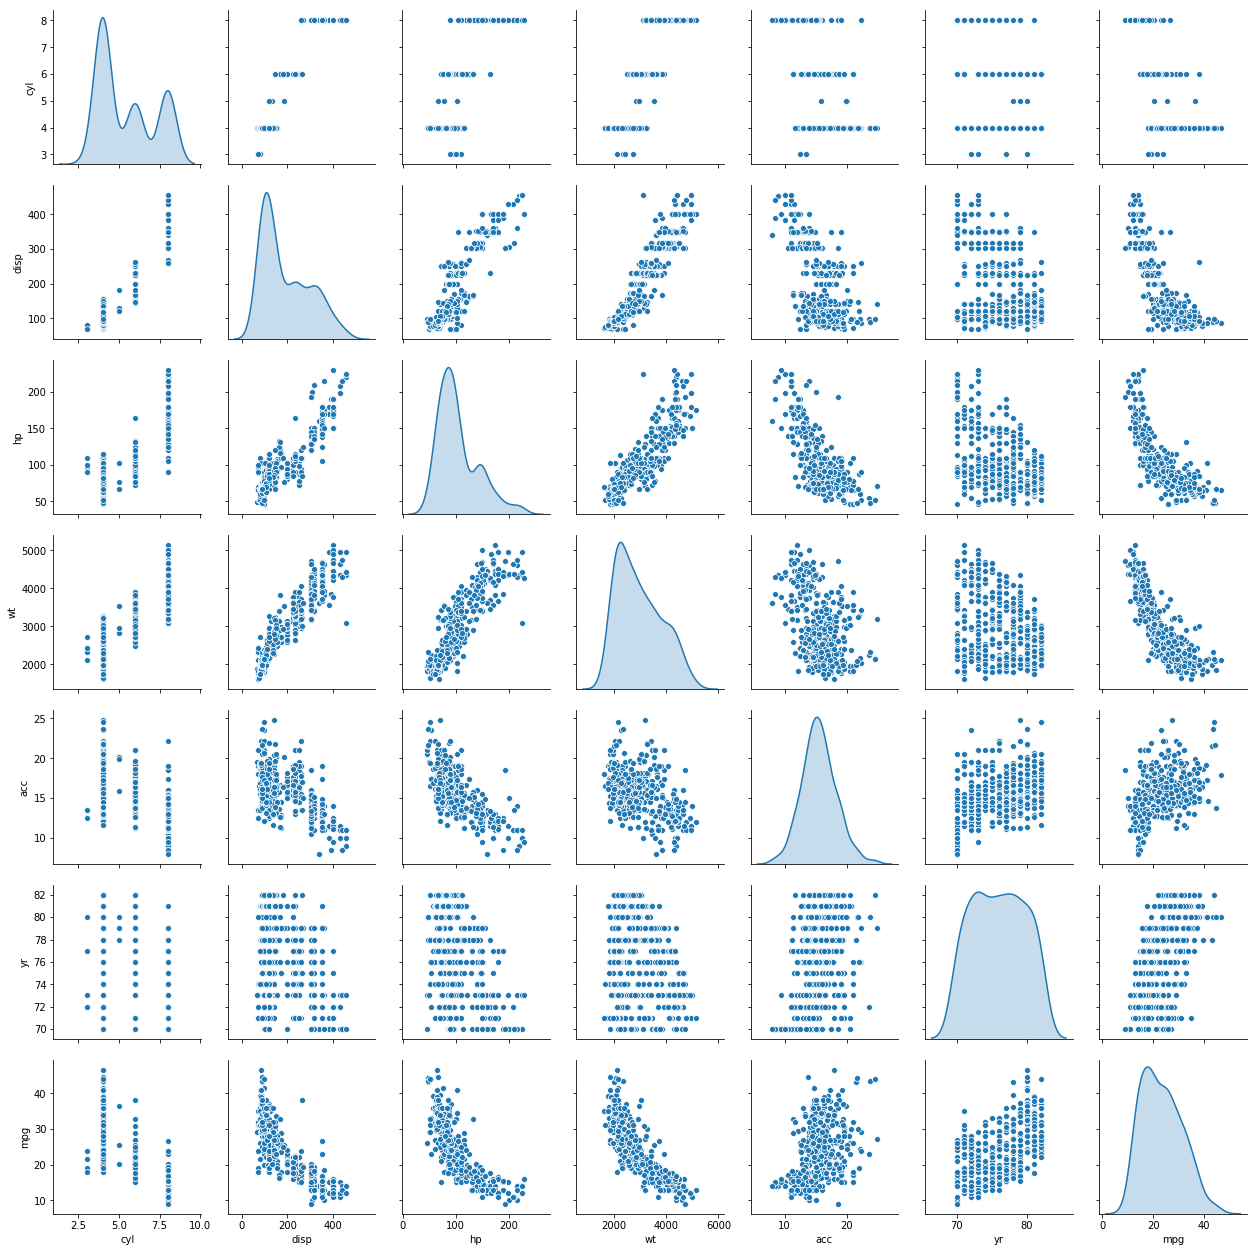

In [132]:
sns.pairplot(car_df, diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002428752FB00>,
      dtype=object)

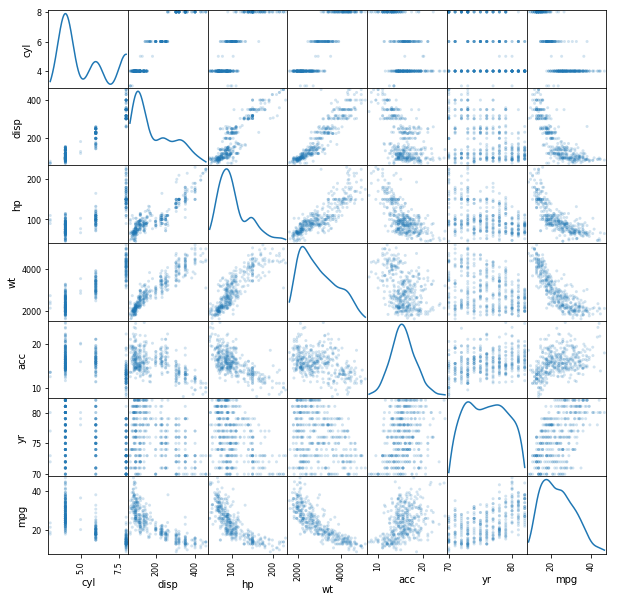

In [133]:
scatter_matrix(car_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [134]:
#Below is the correlation matrix 
corr_matrix = car_df.corr().abs()
print(corr_matrix)

           cyl      disp        hp        wt       acc        yr       mpg
cyl   1.000000  0.950721  0.839313  0.896017  0.505419  0.348746  0.775396
disp  0.950721  1.000000  0.893996  0.932824  0.543684  0.370164  0.804203
hp    0.839313  0.893996  1.000000  0.860886  0.684620  0.411959  0.771762
wt    0.896017  0.932824  0.860886  1.000000  0.417457  0.306564  0.831741
acc   0.505419  0.543684  0.684620  0.417457  1.000000  0.288137  0.420289
yr    0.348746  0.370164  0.411959  0.306564  0.288137  1.000000  0.579267
mpg   0.775396  0.804203  0.771762  0.831741  0.420289  0.579267  1.000000


## Question 3::  Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

In [135]:
#Normalizing the data
newcardf = car_df.drop(["car name"], axis=1)
cardataNormalized = newcardf.apply(zscore)
print(cardataNormalized.shape)

(398, 7)


In [136]:
distortion = []
clusters = range( 1,10)
cluster_errors = []
for num_clusters in clusters:
  model = KMeans(n_clusters=num_clusters, n_init=10,random_state=10)
  model.fit(cardataNormalized)
  prediction = model.predict(cardataNormalized)
  distortion.append(sum(np.min(cdist(cardataNormalized, model.cluster_centers_, 'euclidean'), axis=1)) / cardataNormalized.shape[0])

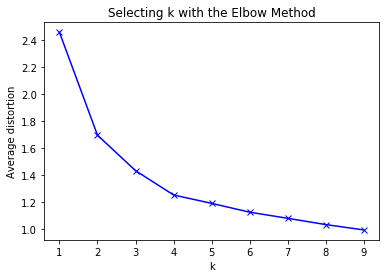

In [137]:
#Plotting the elbow curve for the kmeans clustering algorithm. It can be easily identified from the below elbow curve that the optimal number of 
#clusters is 3
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [138]:
#Constructing the final K means model
final_model=KMeans(n_clusters=4, n_init=10,random_state=10)
final_model.fit(cardataNormalized)
prediction=final_model.predict(cardataNormalized)

In [139]:
#Append the prediction 
car_df["GROUP"] = prediction
car_df[["car name", "GROUP"]]

,car name,GROUP
0,chevrolet chevelle malibu,2
1,buick skylark 320,2
2,plymouth satellite,2
3,amc rebel sst,2
4,ford torino,2
5,ford galaxie 500,2
6,chevrolet impala,2
7,plymouth fury iii,2
8,pontiac catalina,2
9,amc ambassador dpl,2


In [140]:
#Below is the analysis of the number of number of elements in each cluster
cardataNormalized['labels']=(pd.DataFrame(final_model.labels_, columns=list(['labels'])))
pd.value_counts(cardataNormalized['labels'])

3    114
0     99
2     94
1     91
Name: labels, dtype: int64

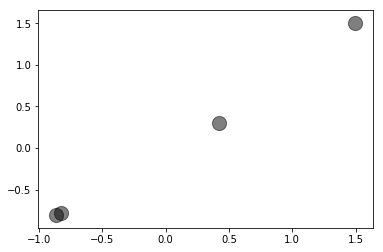

In [141]:
#Plotting the cluster centroid
#The below plotting of the cluster centriod can be misleading because it is a two dimensional representation, 
#it shows two cluster overlapped which in three dimansional space could be apart.
#So in order to get a better representation, we use dendogram analysis.
centers = final_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The cophenetic score is 0.8026579098879428


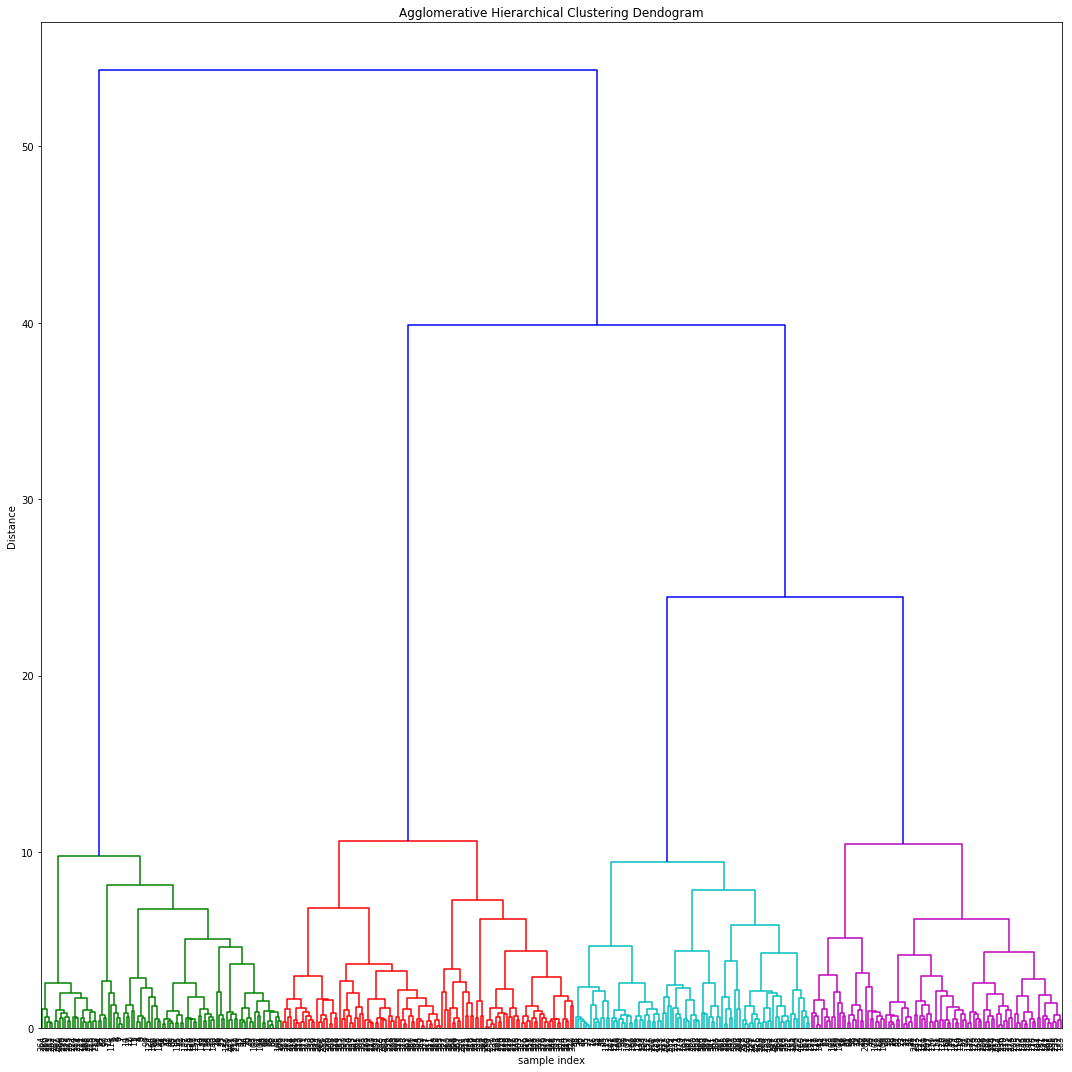

In [142]:
#Analysis of clusters using Hierarchical Agglomeration
#When the best fit line is drawn from distance 20, we observe that there are four different clusters.
Z = linkage(cardataNormalized, method='ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(cardataNormalized))
print("The cophenetic score is {}".format(c))
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90,color_threshold = 20, leaf_font_size=8)
plt.tight_layout()
#It is evident form the below dendogram that there are three clusters.

In [143]:
#Separating the data in the dataframe based on cluster. In the below code cluster_one, cluster_two and cluster_three coresspond to three data frames 
#respective to each cluster
cluster_group = car_df.groupby(["GROUP"])
cluster_one = cluster_group.get_group(0)
cluster_two = cluster_group.get_group(1)
cluster_three = cluster_group.get_group(2)
cluster_four = cluster_group.get_group(3)
#Since we have separated the data frame based on the clustering algorithm, it now becomes easy to be used further.


##Question 4:: Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [144]:
def printLinearRegCoef(df):
  df = df.drop(["car name","GROUP"], axis=1)
  X = df.drop(["mpg"], axis=1)
  y = df["mpg"]
  test_size = 0.30 # taking 70:30 training and test set
  seed = 7  # Random numbmer seeding for reapeatability of the code
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
  linreg = LinearRegression()
  reg_model = linreg.fit(X_train, y_train)
  return reg_model.coef_

In [145]:
printLinearRegCoef(cluster_one)

array([ 2.27386395, -0.06420251, -0.02856044, -0.00486972, -0.27823578,
        0.1879612 ])

In [146]:
printLinearRegCoef(cluster_two)

array([ 0.49166074,  0.00257418, -0.07534037, -0.00269948, -0.47391146,
        0.61839414])

In [147]:
printLinearRegCoef(cluster_three)

array([ 0.00000000e+00, -1.14324153e-02, -2.50611704e-02, -1.91519630e-04,
       -7.85331310e-01,  4.14014166e-01])

In [148]:
printLinearRegCoef(cluster_four)

array([ 0.        , -0.08898631, -0.0379101 , -0.0040163 ,  0.23508001,
        0.75597976])